Transfer learning is a very important concept in the field of computer vision and natural language processing. Using transfer learning you can use pre trained model and customize it for your needs. This saves computation time and money. It has been a revolutionary break through in the field of deep learning and nowadays you see it being used widely in the industry.use google's mobile net v2 pre trained model to train our flowers dataset

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. This area of research bears some relation to the long history of psychological literature on transfer of learning, although practical ties between the two fields are limited. From the practical standpoint, reusing or transferring information from previously learned tasks for the learning of new tasks has the potential to significantly improve the sample efficiency of a reinforcement learning agent

generally saves time and cost

mobile net V2 model is trained at google with 1.4 mil images, 1000classes output

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape= IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

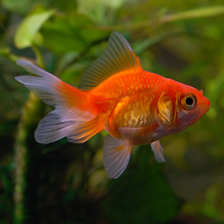

In [6]:
# use model to classify gold fish
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [7]:
# before classification, scale
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [9]:
# add an extra dimension
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
# when predicting, it accepts only multiple images
# gives probability of each class
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [11]:
# ge index with the maximum value
predicted_label_index = np.argmax(result) 
predicted_label_index


2

In [15]:
# now determining the class
with open("ImageNetLabels.txt", "r" ) as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
image_labels[predicted_label_index]

'goldfish'

In [14]:
# using flowers dataset.....
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 9s 0us/step


In [17]:
data_dir

'./datasets/flower_photos'

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/116343334_9cb4acdc57_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/6958342976_a4a9483488_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9048307967_40a164a459_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/13561986193_cf645b2b9a.jpg'),
 PosixPath('datasets/flower_photos/tulips/13176521023_4d7cc74856_m.jpg')]

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16051111039_0f0626a241_n.jpg')]

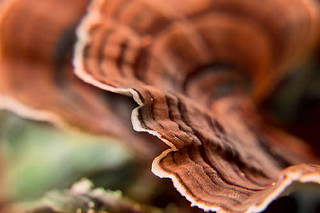

In [22]:
Image.open(str(roses[3]))

In [23]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/116343334_9cb4acdc57_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/6958342976_a4a9483488_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9048307967_40a164a459_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/13561986193_cf645b2b9a.jpg'),
 PosixPath('datasets/flower_photos/tulips/13176521023_4d7cc74856_m.jpg')]

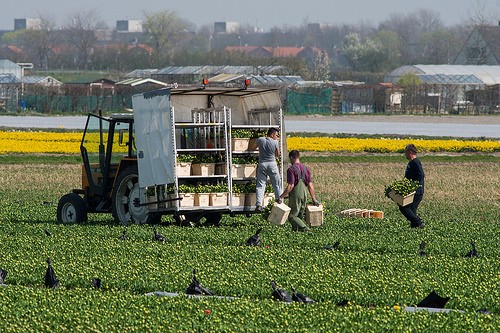

In [24]:
Image.open(str(tulips[3]))

In [25]:
# dictionary where key is the flowwer name
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [26]:
flowers_images_dict['tulips']

[PosixPath('datasets/flower_photos/tulips/116343334_9cb4acdc57_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/6958342976_a4a9483488_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9048307967_40a164a459_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/13561986193_cf645b2b9a.jpg'),
 PosixPath('datasets/flower_photos/tulips/13176521023_4d7cc74856_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3459922572_bc8516b5fe_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/14066056226_d8564a083e_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/2399982682_16929d1f6d_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713387500_6a9138b41b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14097366955_84ef6369f2.jpg'),
 PosixPath('datasets/flower_photos/tulips/5674170543_73e3f403fb.jpg'),
 PosixPath('datasets/flower_photos/tulips/9831362123_5aac525a99_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14103897845_7986002615.jpg'),
 PosixPath('datasets/flower_photos/tulips/5634767665_0a

In [27]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [28]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'

In [29]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(213, 320, 3)

In [30]:
# diferent image sizes
#  hence resize
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [31]:
# using a for loop
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [32]:
X[0]

array([[[  5,   1, 103],
        [ 26,  21, 138],
        [ 11,  29, 199],
        ...,
        [ 12,  17,  69],
        [ 16,  17,  73],
        [ 30,  29, 120]],

       [[  7,   6, 102],
        [ 29,  29, 167],
        [ 10,  26, 201],
        ...,
        [ 24,  24, 109],
        [ 24,  15,  81],
        [ 32,  14, 104]],

       [[  9,  11, 106],
        [ 24,  30, 195],
        [  7,  20, 199],
        ...,
        [ 30,  23, 118],
        [ 16,  11,  80],
        [  8,  15,  89]],

       ...,

       [[ 27,  29,  49],
        [ 30,  33,  41],
        [ 19,  32,  62],
        ...,
        [ 39,  36,  58],
        [ 32,  28,  46],
        [ 23,  24,  38]],

       [[ 29,  30,  52],
        [ 37,  38,  40],
        [ 23,  34,  55],
        ...,
        [ 42,  39,  61],
        [ 36,  32,  50],
        [ 26,  26,  40]],

       [[ 25,  26,  56],
        [ 40,  38,  41],
        [ 22,  30,  46],
        ...,
        [ 41,  38,  60],
        [ 39,  35,  53],
        [ 27,  27,  43]]

In [33]:
X[0]/255

array([[[0.01960784, 0.00392157, 0.40392157],
        [0.10196078, 0.08235294, 0.54117647],
        [0.04313725, 0.11372549, 0.78039216],
        ...,
        [0.04705882, 0.06666667, 0.27058824],
        [0.0627451 , 0.06666667, 0.28627451],
        [0.11764706, 0.11372549, 0.47058824]],

       [[0.02745098, 0.02352941, 0.4       ],
        [0.11372549, 0.11372549, 0.65490196],
        [0.03921569, 0.10196078, 0.78823529],
        ...,
        [0.09411765, 0.09411765, 0.42745098],
        [0.09411765, 0.05882353, 0.31764706],
        [0.1254902 , 0.05490196, 0.40784314]],

       [[0.03529412, 0.04313725, 0.41568627],
        [0.09411765, 0.11764706, 0.76470588],
        [0.02745098, 0.07843137, 0.78039216],
        ...,
        [0.11764706, 0.09019608, 0.4627451 ],
        [0.0627451 , 0.04313725, 0.31372549],
        [0.03137255, 0.05882353, 0.34901961]],

       ...,

       [[0.10588235, 0.11372549, 0.19215686],
        [0.11764706, 0.12941176, 0.16078431],
        [0.0745098 , 0

In [34]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

# Train test Split

In [35]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [36]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Make prediction using pre-trained model on new flowers dataset

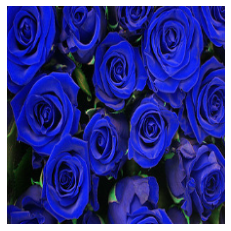

In [40]:
plt.axis('off')
plt.imshow(X[0])

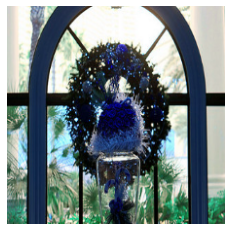

In [42]:
plt.axis('off')
plt.imshow(X[1])

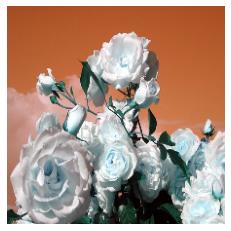

In [43]:
plt.axis('off')
plt.imshow(X[2])

In [45]:
#using classifier to predict model
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis= 1)
predicted

array([795, 801, 722])

In [47]:
image_labels[795]

'shower curtain'

In [48]:

image_labels[801]

'slot'

In [50]:
image_labels[722]

'pillow'

the ready made model is not accurate

hence retrain

using a feature extractor model gives same model exceept the last layer

In [52]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape= (224, 224, 3), trainable= False
)

In [53]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 72s 786ms/step - loss: 0.8318 - acc: 0.6846
Epoch 2/5
86/86 [==============================] - 68s 785ms/step - loss: 0.4118 - acc: 0.8572
Epoch 3/5
86/86 [==============================] - 67s 784ms/step - loss: 0.3179 - acc: 0.8964
Epoch 4/5
86/86 [==============================] - 68s 785ms/step - loss: 0.2628 - acc: 0.9175
Epoch 5/5
86/86 [==============================] - 68s 786ms/step - loss: 0.2283 - acc: 0.9306


In [56]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 777ms/step - loss: 0.3834 - acc: 0.8638


[0.3834184408187866, 0.8638344407081604]

In [ ]:
# 86% accuracy
